SUPERVISED MACHINE LEARNING
|


### **SVM**

**Problem Statement**:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas.

A customer first applies for a home loan; after that, the
company validates the customer’s eligibility for a loan.
The company wants to automate the loan eligibility process (real-time) based on customer details provided while filling out an online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have given a problem of identifying the customers’ segments that are eligible for loan amounts so that they can specifically target these customers.

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd

In [ ]:
list1=['pred.xlsx','test.xlsx','train.xlsx']
for i in list1:
  excel_file_path = i
  excel_data = pd.read_excel(excel_file_path)
  filename=i.replace("xlsx", "csv")
  print("filename",filename)
  csv_file_path = filename
  excel_data.to_csv(csv_file_path, index=False)
  print(f'Excel file "{excel_file_path}" has been successfully converted to CSV file "{csv_file_path}"')

filename pred.csv
Excel file "pred.xlsx" has been successfully converted to CSV file "pred.csv"
filename test.csv
Excel file "test.xlsx" has been successfully converted to CSV file "test.csv"
filename train.csv
Excel file "train.xlsx" has been successfully converted to CSV file "train.csv"


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the training data
train_data = pd.read_csv('/content/train.csv')
print(train_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
X = train_data.drop(columns=['Loan_Status'])  # Features
y = train_data['Loan_Status']  # Target variable

# Split the data into a training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can use different kernels such as 'rbf', 'poly', etc.

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svm_classifier.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_valid, y_pred))

Accuracy: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.40      0.15      0.22        26
           1       0.72      0.90      0.80        62

    accuracy                           0.68        88
   macro avg       0.56      0.53      0.51        88
weighted avg       0.62      0.68      0.63        88



**Confusion matrix**

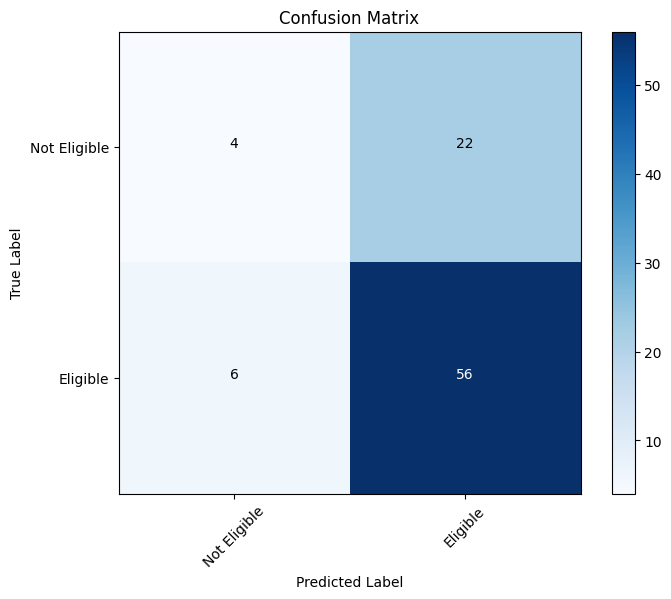

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add axis labels
classes = ['Not Eligible', 'Eligible']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values of the confusion matrix
thresh = cm.max() / 2
for i, j in [(i, j) for i in range(len(classes)) for j in range(len(classes))]:
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


ROC Curve and AUC

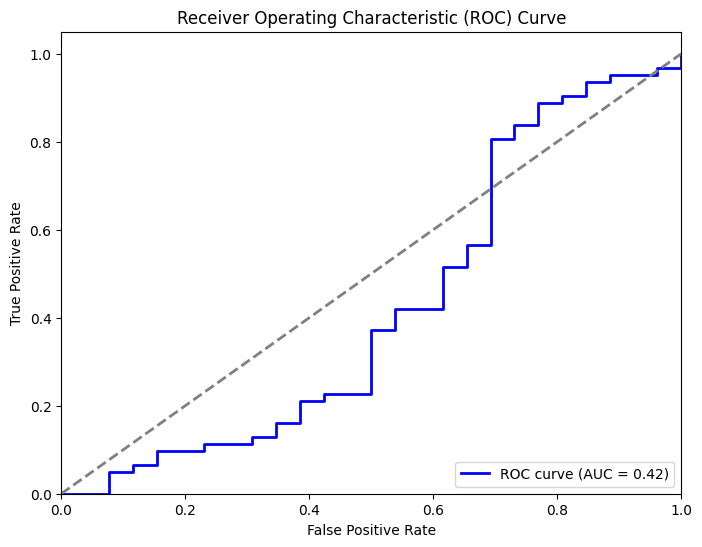

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = svm_classifier.decision_function(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_valid, y_probs))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Precision Recall Curve

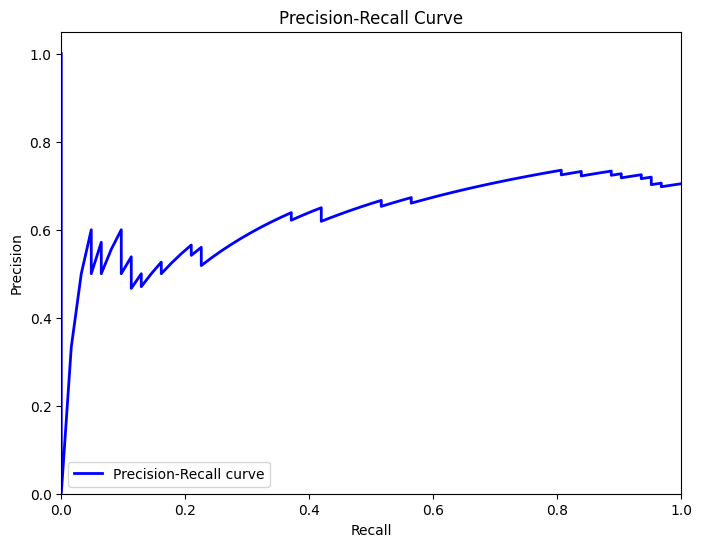

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_valid, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


On Predict Dataset

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Load the 'predict.csv' data
predict_data = pd.read_csv('pred.csv')

# Preprocess the data to match the training data
# Drop unwanted columns
predict_data.drop(columns=['Loan_Status', 'Unnamed: 11'], inplace=True)


# Initialize the SVM model with the same configuration as the trained model
svm_classifier = SVC(kernel='linear')  # Use the same kernel as the trained model
svm_classifier.fit(X, y)
# Fit the model on the entire 'train.csv' dataset (X, y) as shown in the previous code

# Make predictions on the 'predict_data' data
predictions = svm_classifier.predict(predict_data)

# The 'predictions' variable now contains the predicted loan eligibility for the new data in 'predict.csv'


In [ ]:
predictions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

On Test Data

In [ ]:
predict_data = pd.read_csv('test.csv')
predict_data.drop(columns=['Loan_Status'], inplace=True)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)
predictions = svm_classifier.predict(predict_data)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])